In [1]:
import sys
sys.path.append('../../../feature_selection')

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif,chi2,f_classif,SelectKBest
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np
import pickle
import feature_selection_fnc
import tensorflow as tf
from tensorflow import keras
from keras import layers
import keras_tuner
from keras_tuner import BayesianOptimization
from sklearn.preprocessing import MinMaxScaler

In [3]:
cleaned_df=pd.read_csv('../../../../training_data/variance_cleanup_features/variance_cleanup_selected_features.csv')
cleaned_df.set_index('url',inplace=True)

In [4]:
cleaned_df

,phishing,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,...,html_hl_external_favicon,html_hl_external_null_form,html_domain_titel,html_windows_status,html_prompt,html_unsafe_anchor,html_iframe_invisible,html_empty_title,openpagescore,cantina
url,,,,,,,,,,,,,,,,,,,,,
https://www.paducahbank.com/Learn/Whats-Happening/WOW-Magazine/Articles/Phyllis-Russell,0,1,0,87,2,0,3,7,0,0,...,0.0,0.0,0,0,0,1,0,0,4,1.0
https://whatis.techtarget.com/definition/input-output-I-O,0,1,0,57,2,0,3,4,0,0,...,0.0,0.0,0,0,0,1,0,0,6,1.0
https://endeavour.org.uk/,0,1,0,25,2,0,0,3,0,0,...,0.0,0.0,0,0,0,1,0,0,3,1.0
https://gb.123rf.com/footage_121810088_online-registration-front-text-scrolling-on-light-blue-digital-led-display-board-pixel-light-screen-.html?term=121810088,0,1,21,159,3,2,15,3,1,1,...,0.0,0.0,0,0,0,1,0,0,6,1.0
https://www.what-song.com/Movies/Soundtrack/1691/Save-the-Last-Dance,0,1,4,68,2,0,4,6,0,0,...,0.0,0.0,0,0,0,0,0,0,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://smbc-wy.com,1,0,0,18,1,0,1,2,0,0,...,0.0,0.0,0,0,0,1,0,0,0,0.0
http://seuspontosnatalinosincluaseuspontoshoje.club/promocao/descontao/card/home.php?/-5bd/WqhfQbAlLUzAfjSLYzZcOEuURvjjshgpMnP1vIGpaGETuQCK/Pw0qsN7XG1neIhFz5eyuqPJd5mFwxHuZcVIILDiAXQdFX=,1,0,7,186,2,0,1,9,1,1,...,0.0,0.0,0,0,0,0,0,0,0,0.0
https://verificarlbcponline.papomz.com/,1,1,0,39,2,0,0,3,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0


In [5]:
features=cleaned_df.loc[:,'https_true':]
label=cleaned_df.loc[:,'phishing']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)

In [8]:
mi = SelectKBest(score_func=mutual_info_classif, k=50)
mi.fit(X_train,y_train)
X_train_selected=X_train.loc[:, mi.get_support()]
X_test_selected=X_test.loc[:, mi.get_support()]

In [9]:
pickle.dump(mi, open('neuronal_network_selectkbest_v4.pkl', 'wb'))

In [10]:
X_train_selected.to_csv('neuronal_network_selected_train_features_v4.csv',index=True)
X_test_selected.to_csv('neuronal_network_selected_test_features_v4.csv',index=True)

In [11]:
y_train.to_csv('neuronal_network_selected_train_label_v4.csv',index=True)
y_test.to_csv('neuronal_network_selected_test_label_v4.csv',index=True)

In [16]:
import os
os.listdir('../../../../')

['code', 'dataset', 'images', 'readme.md', 'training_data']

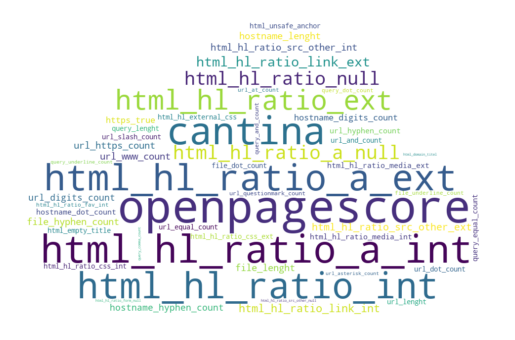

In [12]:
feature_selection_fnc.wordcloud_features(X_train,mi,50,"../../../../images/feature_selection/neuronal_network/neuronal_network_features_word_cloud_v4.png",'../../cloud.png')

In [13]:
scaler = MinMaxScaler()
scaler.fit(X_train_selected)
X_train_normalized_selected = scaler.transform(X_train_selected)
X_test_normalized_selected = scaler.transform(X_test_selected)

In [14]:
pickle.dump(scaler, open('neuronal_network_scaler_v4.pkl', 'wb'))

In [15]:
model_before = keras.Sequential()
model_before.add(layers.Flatten(input_dim=50))
model_before.add(layers.Dense(16, activation='relu'))
model_before.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model_before.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history=model_before.fit(X_train_normalized_selected,y_train,epochs=100,validation_data=(X_test_normalized_selected,y_test))

Epoch 1/100
438/438 [==============================] - 1s 2ms/step - loss: 0.3484 - accuracy: 0.8625 - val_loss: 0.1965 - val_accuracy: 0.9270
Epoch 2/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1697 - accuracy: 0.9354 - val_loss: 0.1544 - val_accuracy: 0.9452
Epoch 3/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1445 - accuracy: 0.9450 - val_loss: 0.1345 - val_accuracy: 0.9530
Epoch 4/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1329 - accuracy: 0.9506 - val_loss: 0.1281 - val_accuracy: 0.9575
Epoch 5/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1267 - accuracy: 0.9522 - val_loss: 0.1201 - val_accuracy: 0.9572
Epoch 6/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1226 - accuracy: 0.9534 - val_loss: 0.1169 - val_accuracy: 0.9617
Epoch 7/100
438/438 [==============================] - 1s 1ms/step - loss: 0.1193 - accuracy: 0.9561 - val_loss: 0.1138 - val_accuracy: 0.9633

In [18]:
y_pred = model_before.predict(X_test_normalized_selected)
y_pred = tf.squeeze(y_pred)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

188/188 [==============================] - 0s 679us/step


Accuracy: 0.973
Recall: 0.9741870600067046


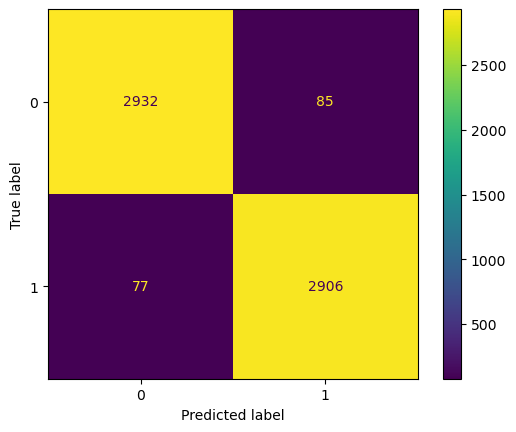

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
plt.savefig('../../../../images/hyperparameter_tuning/neuronal_network/neuronal_network_confusion_matrix_before_tuning_v4',dpi=300, bbox_inches = "tight")

In [20]:
model_before.save('../../../saved_models/neuronal_network/neuronal_network_before_v4.keras')

In [29]:
def create_model(hp):
  num_hidden_layers=1 #hidden layer
  num_units=16
  dropout_rate=0 #dropout rate
  learning_rate=0.1 #learning_Rate

  if hp:  #creating a hyperparmeter with choices
    num_hidden_layers=hp.Choice('num_hidden_layers',values=[1,2,3])
    num_units = hp.Int('num_units', min_value=16, max_value=1024, step=16)
    #num_units=hp.Choice('num_units',values=[8,16,32])
    dropout_rate=hp.Float('dropout_rate',min_value=0.1,max_value=0.5)
    learning_rate=hp.Float('learning_rate',min_value=0.0001,max_value=0.01)

  model=tf.keras.models.Sequential() #creating a sequential model

  model.add(layers.Flatten(input_dim=50)) #flatten the layer
  #model.add(layers.Lambda(lambda x: x/255.))

  for _ in range(0, num_hidden_layers):
    model.add(layers.Dense(num_units,activation='relu')) #relu activation
    model.add(layers.Dropout(dropout_rate))

  model.add(layers.Dense(1,activation='sigmoid')) #softmax activation

  model.compile(
      loss='binary_crossentropy',
      optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
      metrics=['accuracy']
  )
  return model


In [30]:
#creating model summary
create_model(None).summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                816       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833 (3.25 KB)
Trainable params: 833 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
#defining a class with custom tuner using bayesian optimzation
class CustomTuner(keras_tuner.tuners.BayesianOptimization):
  def run_trial(self,trial, *args, **kwargs):
    kwargs['batch_size']=trial.hyperparameters.Int('batch_size',32,512,step=32) #giving batch size
    return super(CustomTuner,self).run_trial(trial,*args,**kwargs)




In [32]:
#running a custom tuner
tuner=CustomTuner(
    create_model,
    objective='val_accuracy', #validation accuracy
    max_trials=50,           #defining max number of trials
    directory='logs',
    project_name='phishing_tuning_v4',
    overwrite=True
)



In [33]:
tuner.search_space_summary()



Search space summary
Default search space size: 4
num_hidden_layers (Choice)
{'default': 1, 'conditions': [], 'values': [1, 2, 3], 'ordered': True}
num_units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 1024, 'step': 16, 'sampling': 'linear'}
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': None, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'linear'}


In [34]:
tuner.search(
    X_train_normalized_selected,y_train,
    validation_data=(X_test_normalized_selected,y_test),
    epochs=500,verbose=True
)



Trial 50 Complete [00h 08m 12s]
val_accuracy: 0.9760000109672546

Best val_accuracy So Far: 0.9776666760444641
Total elapsed time: 03h 31m 47s


In [35]:
tuner.results_summary(10)




Results summary
Results in logs\phishing_tuning_v4
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 03 summary
Hyperparameters:
num_hidden_layers: 1
num_units: 512
dropout_rate: 0.3924981783164433
learning_rate: 0.008662004122843077
batch_size: 192
Score: 0.9776666760444641

Trial 23 summary
Hyperparameters:
num_hidden_layers: 1
num_units: 288
dropout_rate: 0.480639803315571
learning_rate: 0.0035802919134802686
batch_size: 480
Score: 0.9776666760444641

Trial 35 summary
Hyperparameters:
num_hidden_layers: 1
num_units: 512
dropout_rate: 0.3889167387329038
learning_rate: 0.008657983486702709
batch_size: 224
Score: 0.9775000214576721

Trial 41 summary
Hyperparameters:
num_hidden_layers: 1
num_units: 256
dropout_rate: 0.450454234512205
learning_rate: 0.0027586581961404942
batch_size: 416
Score: 0.9775000214576721

Trial 04 summary
Hyperparameters:
num_hidden_layers: 1
num_units: 368
dropout_rate: 0.17301038733152174
learning_rate: 0.009391107784460498
batch_siz

In [36]:
model=tuner.get_best_models(num_models=1)[0]
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 512)               26112     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 26625 (104.00 KB)
Trainable params: 26625 (104.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
history=model.fit(X_train_normalized_selected,y_train,epochs=500,batch_size=192,validation_data=(X_test_normalized_selected,y_test))

Epoch 1/500
73/73 [==============================] - 1s 4ms/step - loss: 0.0425 - accuracy: 0.9851 - val_loss: 0.1050 - val_accuracy: 0.9767
Epoch 2/500
73/73 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.9862 - val_loss: 0.1063 - val_accuracy: 0.9748
Epoch 3/500
73/73 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9870 - val_loss: 0.1148 - val_accuracy: 0.9732
Epoch 4/500
73/73 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9860 - val_loss: 0.1095 - val_accuracy: 0.9737
Epoch 5/500
73/73 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9866 - val_loss: 0.1085 - val_accuracy: 0.9748
Epoch 6/500
73/73 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9877 - val_loss: 0.1116 - val_accuracy: 0.9743
Epoch 7/500
73/73 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9856 - val_loss: 0.1118 - val_accuracy: 0.9735
Epoch 8/500
7

In [38]:
y_pred = model.predict(X_test_normalized_selected)
y_pred = tf.squeeze(y_pred)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

188/188 [==============================] - 0s 668us/step


Accuracy: 0.9721666666666666
Recall: 0.9812269527321489


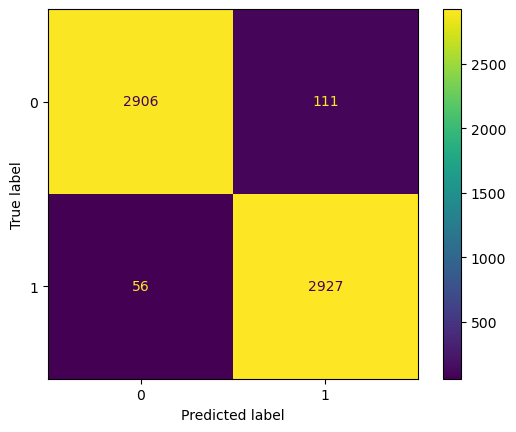

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
plt.savefig('../../../../images/hyperparameter_tuning/neuronal_network/neuronal_network_confusion_matrix_after_tuning_v4',dpi=300, bbox_inches = "tight")

In [40]:
model.save('../../../saved_models/neuronal_network/neuronal_network_tuned_v4.keras')

In [41]:
model_test=keras.models.load_model('../../../saved_models/neuronal_network/neuronal_network_tuned_v4.keras',safe_mode=False)

In [43]:
X_train_selected_test=pd.read_csv('neuronal_network_selected_train_features_v4.csv')
X_test_selected_test=pd.read_csv('neuronal_network_selected_test_features_v4.csv')

In [44]:
X_train_selected_test.set_index('url',inplace=True)
X_test_selected_test.set_index('url',inplace=True)

In [45]:
scaler = MinMaxScaler()
scaler.fit(X_train_selected_test)
X_train_normalized_selected_test = scaler.transform(X_train_selected_test)
X_test_normalized_selected_test = scaler.transform(X_test_selected_test)

In [46]:
y_pred_test = model.predict(X_test_normalized_selected)
y_pred_test = tf.squeeze(y_pred_test)
y_pred_test = np.array([1 if x >= 0.5 else 0 for x in y_pred_test])

188/188 [==============================] - 0s 652us/step


Accuracy: 0.9721666666666666
Recall: 0.9812269527321489


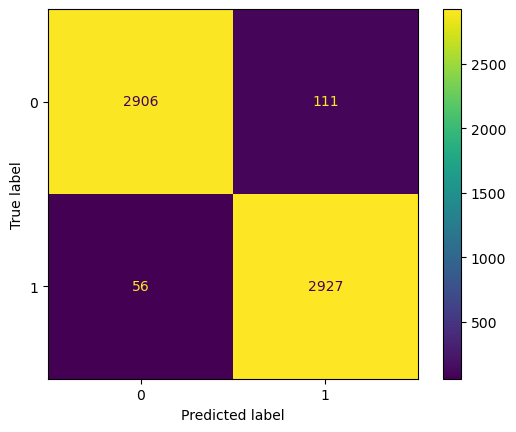

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
conf_mat = confusion_matrix(y_test,y_pred_test)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()